#1. Data Profiling

1.1 Dataset load

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_org = pd.read_csv('/content/ds_salaries.csv')

# Create a copy of the original dataset
df = df_org.copy()

1.2 Check Basic Structure with df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


1.3 Preview Data with df.head()

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


1.4 Numerical Statistics with df.describe()

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


1.5 Categorical Distributions with df.value_counts()

In [7]:
#Check distribution of job titles
print(df['job_title'].value_counts())

# # Check experience levels
print(df['experience_level'].value_counts())

# # Check company sizes
print(df['company_size'].value_counts())

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Principal Data Architect        1
Head of Machine Learning        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 93, dtype: int64
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
company_size
M    3153
L     454
S     148
Name: count, dtype: int64


#2.Data Quality Check

 2.1 Check for Missing Values

In [8]:
print("-"*50)
print("1. MISSING VALUES CHECK (df.isnull().sum())")
print("-"*50)
missing_values = df.isnull().sum()
print(missing_values)

--------------------------------------------------
1. MISSING VALUES CHECK (df.isnull().sum())
--------------------------------------------------
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


2.2 Handling Missing Value

In [9]:
if missing_values.sum() > 0:
    print("\nHandling missing values...")

    # Separate numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # Fill numerical with median
    for col in num_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled {col} with median: {median_val}")

    # Fill categorical with mode
    for col in cat_cols:
      if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled {col} with mode: {mode_val}")
else:
    print("\nNo missing values found!")


No missing values found!


2.3 Check for Duplicates


In [11]:
print("\n" + "="*50)#making Output beautiful
print("2. DUPLICATE RECORDS CHECK")
print("="*50) #making Output beautiful
duplicates = df.duplicated().sum()
print(f"Found {duplicates} duplicate rows")

if duplicates > 0:
    print("\nSample duplicate rows:") # Display sample duplicates before removal
    print(df[df.duplicated(keep=False)].head())


# df.duplicated(keep=False): This identifies all duplicated rows in the DataFrame df.

# The keep=False argument means all instances of a duplicate will be marked as True.

# (By contrast, keep='first' or keep='last' would mark only some duplicates.)

# df[...]: Filters the DataFrame to include only duplicated rows.

# .head(): Returns the first 5 duplicated rows for quick inspection.




    df.drop_duplicates(inplace=True)# Remove duplicates
    print(f"\nRemoved {duplicates} duplicates. New shape: {df.shape}")
else:
    print("No duplicates found!")


2. DUPLICATE RECORDS CHECK
Found 0 duplicate rows
No duplicates found!


2.4 Verify Data Types

In [12]:
print("-"*50)
print("3. DATA TYPE VERIFICATION")
print("-"*50)
print("Current data types:")
print(df.dtypes)

# Convert appropriate columns to category type
cat_columns = ['experience_level', 'employment_type', 'company_size']
for col in cat_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"Converted {col} to category")

#  work_year lai  datetime ma convert
if 'work_year' in df.columns:
    df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')
    print("Converted work_year to datetime")

print("\nUpdated data types:")
print(df.dtypes)

--------------------------------------------------
3. DATA TYPE VERIFICATION
--------------------------------------------------
Current data types:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
Converted experience_level to category
Converted employment_type to category
Converted company_size to category
Converted work_year to datetime

Updated data types:
work_year             datetime64[ns]
experience_level            category
employment_type             category
job_title                     object
salary                         int64
salary_currency               object
salary_in_usd                  int64
employee_residence            object
remote_ratio                   int64
company_location     

#3. Visualization

3.1 Univariate analysis

----------------------------------------------------------------------------------------------------
1. UNIVARIATE ANALYSIS (Distribution of Single Variables)
----------------------------------------------------------------------------------------------------


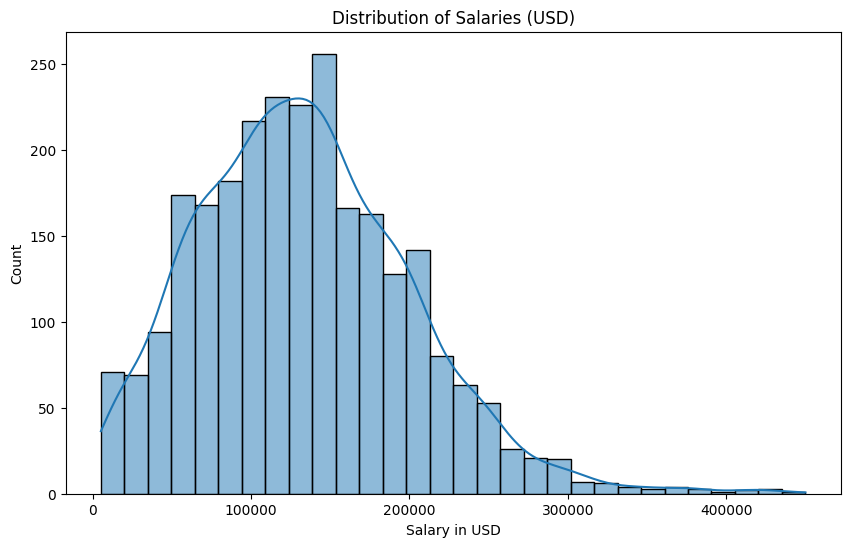

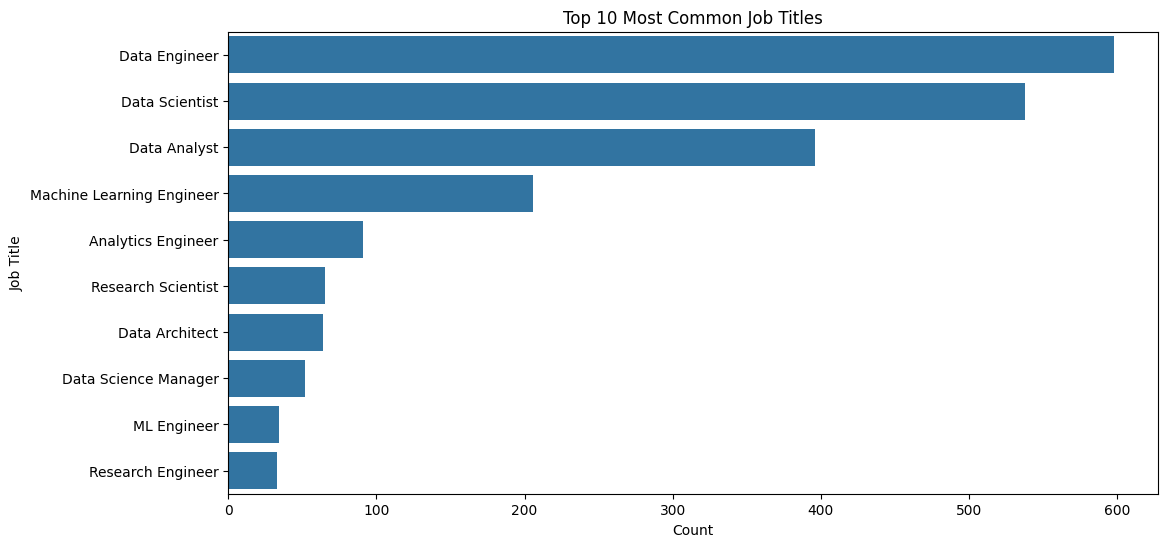

In [13]:
print("-"*100)
print("1. UNIVARIATE ANALYSIS (Distribution of Single Variables)")
print("-"*100)

# Histogram for salary distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='salary_in_usd', bins=30, kde=True)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.show()



#countplot job title
plt.figure(figsize=(12,6))
top_jobs = df['job_title'].value_counts().head(10).index
sns.countplot(data=df[df['job_title'].isin(top_jobs)], y='job_title', order=top_jobs)
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

3.2 Bivariate Analysis

----------------------------------------------------------------------

3.2. BIVARIATE VISUALIZATIONS
----------------------------------------------------------------------


<ipython-input-14-698c17cf3662>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=order, palette='Set2')


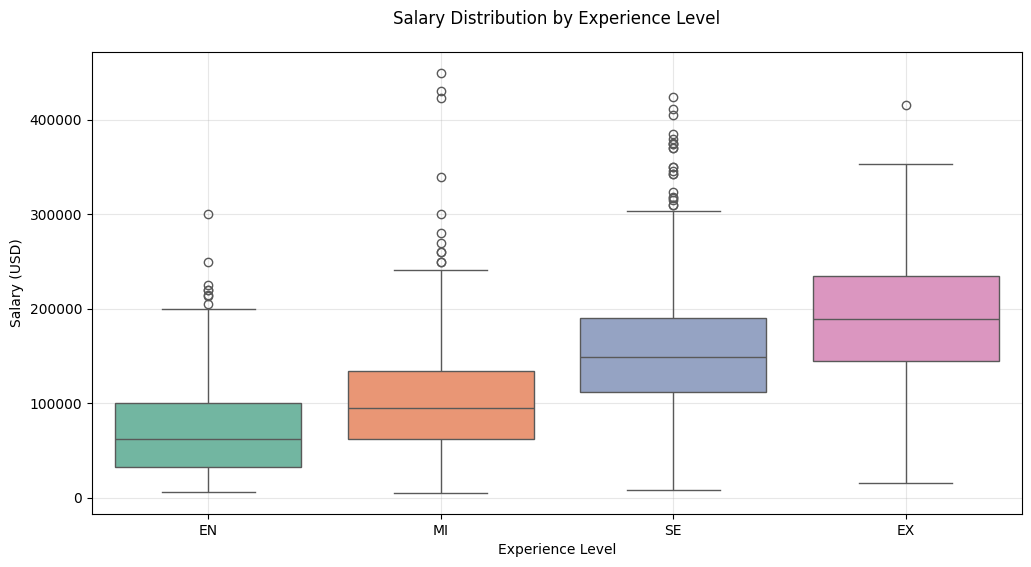

<ipython-input-14-698c17cf3662>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='company_size', y='salary_in_usd',


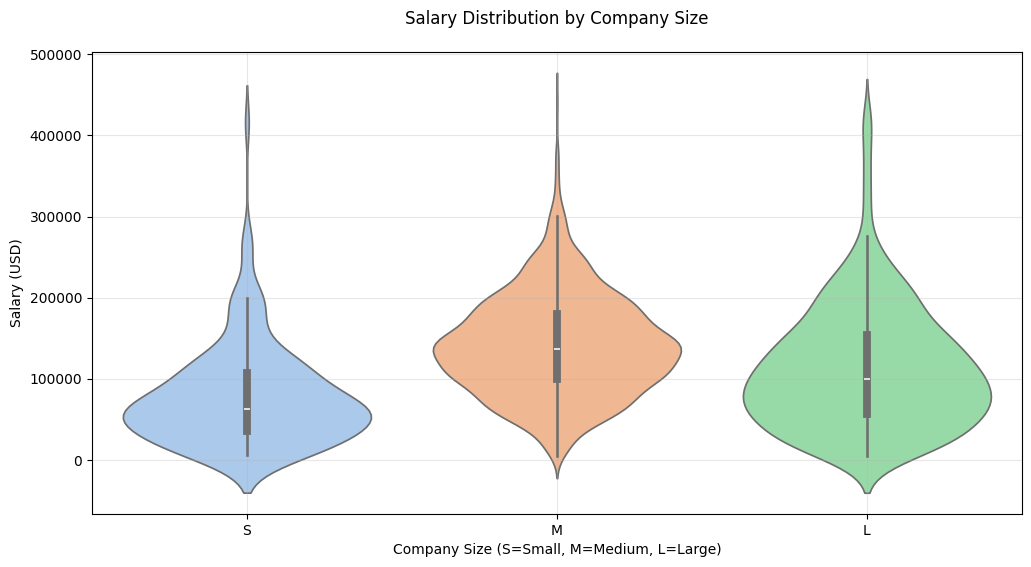

In [14]:
print("-"*70)
print("\n3.2. BIVARIATE VISUALIZATIONS")
print("-"*70)
plt.figure(figsize=(12, 6))
order = ['EN', 'MI', 'SE', 'EX']  # Entry, Mid, Senior, Executive
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=order, palette='Set2')
#Salary vs Experience
plt.title('Salary Distribution by Experience Level', pad=20)#padding 20 rakheko
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.grid(True, alpha=0.3)
plt.show()


#violin plot salary vs company size
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='company_size', y='salary_in_usd',
               order=['S', 'M', 'L'], palette='pastel')
plt.title('Salary Distribution by Company Size', pad=20)
plt.xlabel('Company Size (S=Small, M=Medium, L=Large)')
plt.ylabel('Salary (USD)')
plt.grid(True, alpha=0.3)
plt.show()

3.3 Correlation Analysis

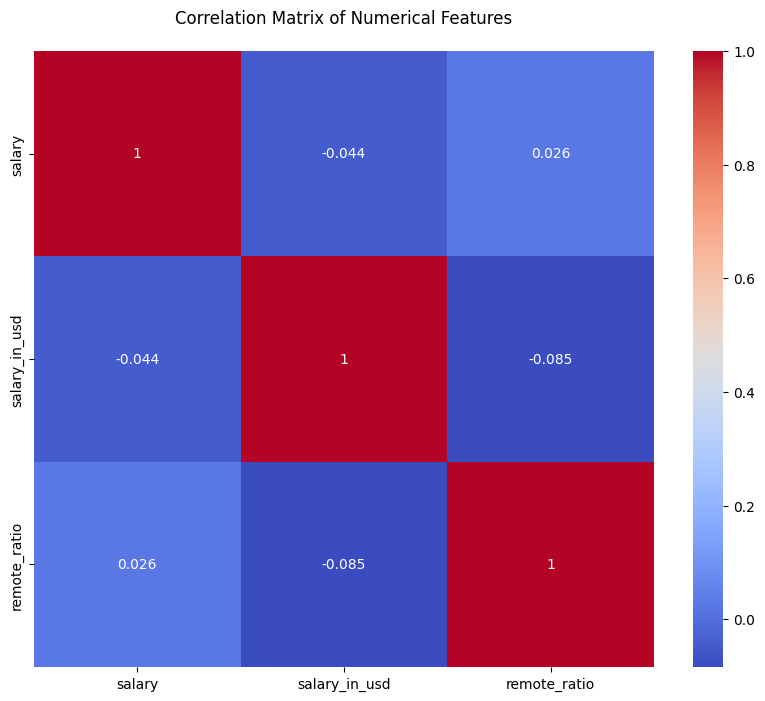

In [15]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', pad=20)
plt.show()

#4. Outlier Detection and Handling

4.1. Visualizing Outlier

--------------------------------------------------
STEP 4: OUTLIER DETECTION AND HANDLING
--------------------------------------------------

1. OUTLIER VISUALIZATION
Found 29 outlier salaries


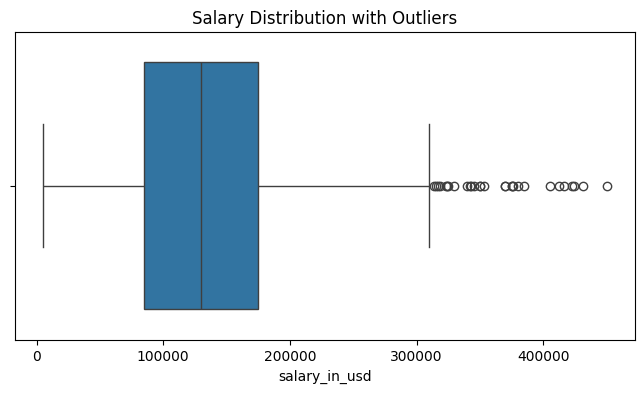

In [16]:
print("-"*50)
print("STEP 4: OUTLIER DETECTION AND HANDLING")
print("-"*50)
print("\n1. OUTLIER VISUALIZATION")

Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#outliers
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print(f"Found {len(outliers)} outlier salaries")
plt.figure(figsize=(8,4))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Distribution with Outliers')
plt.show()




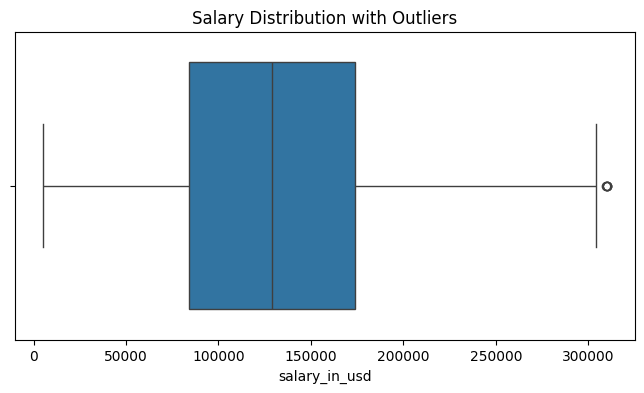

In [17]:
#handling Outlier
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]
plt.figure(figsize=(8,4))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Distribution with Outliers')
plt.show()

#5. Feature Engineering

5.1 Creating new feature named salary to  Experience ratio

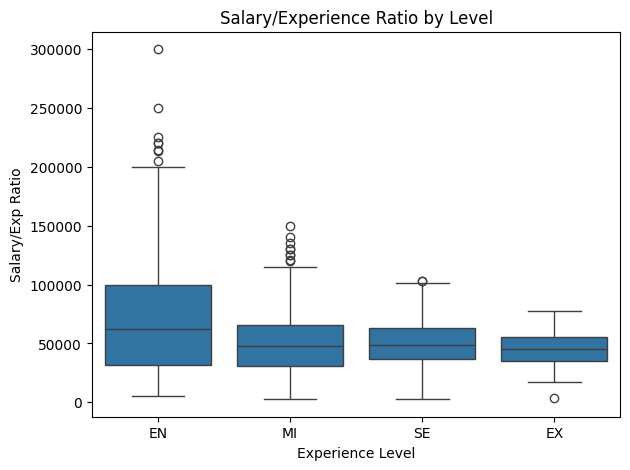

In [25]:
df['salary_exp_ratio'] = df['salary_in_usd'] / (
    df['experience_level'].astype(str).map({
        'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4
    })
)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='experience_level', y='salary_exp_ratio',
            order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salary/Experience Ratio by Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary/Exp Ratio')
plt.show()


5.2 Creating Salaries bin

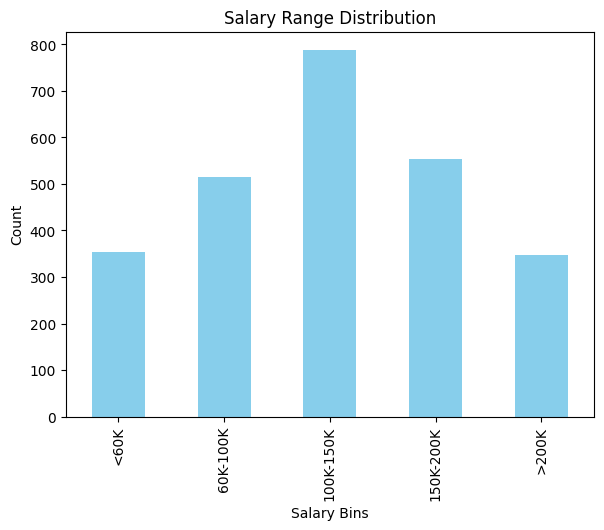

In [26]:
df['salary_bin'] = pd.cut(df['salary_in_usd'],
                         bins=[0, 60000, 100000, 150000, 200000, float('inf')],
                         labels=['<60K', '60K-100K', '100K-150K', '150K-200K', '>200K'])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
df['salary_bin'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Salary Range Distribution')
plt.xlabel('Salary Bins')
plt.ylabel('Count')
plt.show()

5.3 Showing sample of new features

In [27]:
print("\nSample data with new features:")
print(df[['experience_level', 'salary_in_usd', 'salary_exp_ratio', 'salary_bin']].head())


Sample data with new features:
  experience_level  salary_in_usd  salary_exp_ratio salary_bin
0               SE          85847      28615.666667   60K-100K
1               MI          30000      15000.000000       <60K
2               MI          25500      12750.000000       <60K
3               SE         175000      58333.333333  150K-200K
4               SE         120000      40000.000000  100K-150K
